# 2016 Voter Survey


## Citation
To reference the VOTER survey, please use this protocol:
Democracy Fund Voter Study Group. VIEWS OF THE ELECTORATE RESEARCH SURVEY, December 2016. [Computer File] Release 1: August 28, 2017. Washington DC: Democracy Fund Voter Study
Group [producer] https://www.voterstudygroup.org/.

## Summary

YouGov, a global political survey firm, conducted an online survey between November 29 and December 29, 2016 on political beliefs. The survey was conducted after realizing the need to better understand voters' decision-making processes when given certain candidate choices. Around 8,000 adults took the survey, resulting in this dataset.

## Features
Each of the following questions were answered with the following labels:

- Very favorable  
- Somewhat favorable  
- Somewhat unfavorable  
- Very unfavorable  
- Don't know  

**fav_trump_2016**: Do you have a favorable or an unfavorable opinion of the following
people? DONALD TRUMP  

**fav_cruz_2016**: Do you have a favorable or an unfavorable opinion of the following
people? TED CRUZ  

**fav_ryan_2016**: Do you have a favorable or an unfavorable opinion of the following
people? PAUL RYAN  

**fav_romn_2016**: Do you have a favorable or an unfavorable opinion of the following
people?  MITT ROMNEY

**fav_obama_2016**: Do you have a favorable or an unfavorable opinion of the following
people? BARACK OBAMA  

**fav_hrc_2016**: Do you have a favorable or an unfavorable opinion of the following
people? HILLARY CLINTON  

**fav_sanders_2016**: Do you have a favorable or an unfavorable opinion of the following
people? BERNIE SANDERS  

**fav_rubio_2016**:Do you have a favorable or an unfavorable opinion of the following
people? MARCO RUBIO  

## Target

**presvote16post_2016**: Who did you vote for in the election for President? (order of
Clinton and Trump randomized)  

- Hillary Clinton

- Donald Trump  

- Gary Johnson  

- Jill Stein  

- Evan McMullin  

- Other  

- Did not vote for President  


## Motivation

Given the selection of candidates on a ballot, how do voters decide which candidate to cast their vote to? Before any type of political election, voters must consolidate their thoughts and evaluate each candidate to see who is the best fit. Consolidation of values, backgrounds, the future and more are all important factors considered by voters. Of course, voters typically support candidates that promise reforms aligning with their own personal beliefs of where the country should go. Often times, voters' top choices are not always in the final running, so how do people adjust their decisions based on the remaining candidates? And breaking beyond the surface, I want to see if there is a separating feature that causes the divide in the political sphere. For instance, how did the differences and divide amongst one of the most popular particians, Republicans vs. Democrats, in our government came out? 

My main goal for this project is to discover the relationship between a voter's view on potential candidates to who they actually cast their ballot for. To assist this task, I took data from a 2016 election survey, which contains answers from 8,000 participants about their political views. I decided to focus on how each survey taker felt about the potential candidates (features 29-37) and who the survey taker actually voted for (feature 14). I utilize Principle Component Analysis (PCA) in order to reduce dimensionality of the space in order to visualize how voters fit on the political spectrum. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

In [2]:
voter_2016 = pd.read_csv('VOTER_Survey_December16_Release1.csv', low_memory = False)

voter_2016.head(3)

,case_identifier,weight,PARTY_AGENDAS_rand_2016,pp_primary16_2016,pp_demprim16_2016,pp_repprim16_2016,inputstate_2016,izip_2016,votereg2_2016,votereg_f_2016,...,post_HouseCand3Name_2012,post_HouseCand3Party_2012,post_SenCand1Name_2012,post_SenCand1Party_2012,post_SenCand2Name_2012,post_SenCand2Party_2012,post_SenCand3Name_2012,post_SenCand3Party_2012,starttime_2016,endtime_2016
0,779,0.358213,Republican Party,In the Democratic primary,Hillary Clinton,NaN,California,94952,Yes,Yes,...,NaN,NaN,Shelley Berkley,Democratic,Dean Heller,Republican,NaN,NaN,29nov2016 22:59:43,29nov2016 23:28:24
1,2108,0.562867,Republican Party,In the Republican primary,NaN,Donald Trump,Arizona,85298,Yes,Yes,...,NaN,NaN,Richard Carmona,Democratic,Jeff Flake,Republican,NaN,NaN,29nov2016 15:41:28,29nov2016 18:58:28
2,2597,0.552138,Republican Party,In the Democratic primary,Hillary Clinton,NaN,Wisconsin,54904,Yes,Yes,...,NaN,NaN,Tammy Baldwin,Democratic,Tommy Thompson,Republican,NaN,NaN,29nov2016 16:08:39,29nov2016 16:32:43


In [3]:
# see what candidate survey taker prefers 
candidates_favor = voter_2016.columns.values[29:37]

rating_scale = np.array(["Very favorable", "Somewhat favorable",
             "Somewhat unfavorable", "Very unfavorable",
             "Don't know", ""])

# create dictionary to map numeric values to survey taker reactions 
rating_dict = {"Very favorable": 2, "Somewhat favorable": 1,
             "Somewhat unfavorable": -1, "Very unfavorable": -2,
             "Don't know": 0, "": 0}

# target is who the survey taker voted for
actualVote = voter_2016.columns.values[14]

target_dict = {"Hillary Clinton":1, "Donald Trump":2, 
               "Gary Johnson": 3, "Jill Stein": 4, 
               "Evan McMullin": 5, "Other": 6, 
               "Did not vote for President": 7, 
               ".": 0 }

In [4]:
favorable_opinion_matrix = voter_2016.loc[:,candidates_favor]
target = voter_2016.loc[:,actualVote]
for col in range(len(candidates_favor)):
    # convert text to numeric values
    favorable_opinion_matrix[candidates_favor[col]] = favorable_opinion_matrix[candidates_favor[col]].map(rating_dict)
    # replacing all nans with 0
    favorable_opinion_matrix[candidates_favor[col]].fillna(0, inplace = True) 

# fill nans for columns 
target.fillna(0,inplace= True)

In [5]:
# concatentate targets to original data frame 
new_df = pd.concat([favorable_opinion_matrix, target], axis=1)
# map numerical values to candidates for visualization purposes
new_df['presvote16post_2016'] = new_df['presvote16post_2016'].map(target_dict)


In [6]:
# checking if all nans are gone
print(favorable_opinion_matrix.isnull().values.any())
print(target.isnull().values.any())

False
False


In [7]:
# perform PCA
q = 4
pca = PCA(n_components = q)
Z = pca.fit_transform(favorable_opinion_matrix)
var_ratio = pca.explained_variance_ratio_

principalDf = pd.DataFrame(data = Z
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4'])

In [8]:
pca.components_

array([[ 0.42928519,  0.32891668,  0.27049132,  0.15370247, -0.46200778,
        -0.41350862, -0.36246199,  0.30808893],
       [-0.17763207,  0.22384456,  0.48470078,  0.58534096,  0.27165757,
         0.28000293,  0.24293107,  0.35995359],
       [-0.09971252, -0.53870264,  0.04219436,  0.48449483, -0.21722557,
        -0.51887992,  0.32168304, -0.2084178 ],
       [-0.41186077, -0.19385899, -0.08531805,  0.3470401 , -0.0330232 ,
         0.15589904, -0.79445237, -0.09232433]])

In [9]:
# original dataframe
favorable_opinion_matrix.head(3)

,fav_trump_2016,fav_cruz_2016,fav_ryan_2016,fav_romn_2016,fav_obama_2016,fav_hrc_2016,fav_sanders_2016,fav_rubio_2016
0,-2.0,-2.0,-1.0,-1.0,2.0,2.0,2.0,-1.0
1,2.0,2.0,2.0,2.0,-2.0,-2.0,-2.0,2.0
2,-2.0,-2.0,-2.0,-2.0,2.0,2.0,1.0,-2.0


In [10]:
# adding targets to new data frame 
new_principalDf = pd.concat([principalDf,target], axis=1)
# visualize our principal component Data frame 
new_principalDf.head(3)

,principal component 1,principal component 2,principal component 3,principal component 4,presvote16post_2016
0,-4.328888,0.762804,-0.276063,-0.267661,Hillary Clinton
1,5.852681,2.059273,-0.217220,0.503959,Donald Trump
2,-4.698709,-0.910123,-0.916017,0.357394,Hillary Clinton


In [11]:
print ('Original Shape: ', favorable_opinion_matrix.shape)
print ('Reduced Shape: ', Z.shape)

Original Shape:  (8000, 8)
Reduced Shape:  (8000, 4)


In [12]:
print ('Ratio of variance explained: ', var_ratio)
# reduced features down to 4 components to get 88% ratio of variance explained
print(pca.explained_variance_ratio_.cumsum())

Ratio of variance explained:  [0.65525026 0.12418475 0.05230979 0.04654282]
[0.65525026 0.77943501 0.8317448  0.87828762]


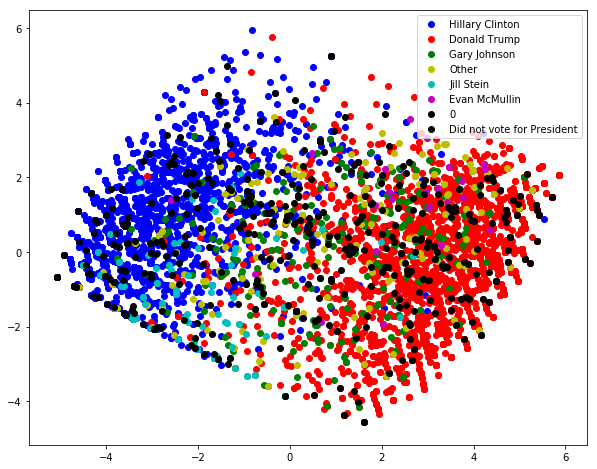

In [24]:
# each reaction to candidate corresponds to an index
candidates = new_principalDf['presvote16post_2016']

colormap = ['b','r','g','y','c','m','k', 'k']
# visual new axes
plt.figure(figsize=(10, 8))
for i, c in enumerate(candidates.unique()):
    Z_target = Z[new_principalDf['presvote16post_2016'] == c]
    plt.scatter(Z_target[:, 0], Z_target[:, 1], c=colormap[i])
    
plt.legend(candidates.unique())

In [14]:
# eigenvalues are given by the components of PCA
pca.components_

array([[ 0.42928519,  0.32891668,  0.27049132,  0.15370247, -0.46200778,
        -0.41350862, -0.36246199,  0.30808893],
       [-0.17763207,  0.22384456,  0.48470078,  0.58534096,  0.27165757,
         0.28000293,  0.24293107,  0.35995359],
       [-0.09971252, -0.53870264,  0.04219436,  0.48449483, -0.21722557,
        -0.51887992,  0.32168304, -0.2084178 ],
       [-0.41186077, -0.19385899, -0.08531805,  0.3470401 , -0.0330232 ,
         0.15589904, -0.79445237, -0.09232433]])

# Ending Remarks

We successfully utilized the information in the survey to see where people fit within the political spectrum. Along the way, we were able to use the participants' opinions on presidential candidates and consolidate it to 4 principal components using PCA, which explains 88% of the variance in the data. Using this visualization, we are able to see there is a pretty prominent divide between our survey voters who voted Democratic versus those who voted Republican. It is incredibly interesting to note that many survey takers who did not vote are located all over the spectrum. For future analysis, it would be intriguing to re-evaluate the dataset with more factors to specifically differentiates these abstained voters from those who voted. 

## Ways to Improve
1. Perform PCA with more features, see if that changes our visualization/analysis
2. Keep track of these voters, and use this data to possibly predict the next election results. This would be interesting to see how voter behavior changes from election to election.
